## Names Analysis Exercise

### 0. 数据集描述

美国社会保障管理局（SSA）提供了一份从1880年至今的婴儿名字频率数据集。详见项目文件`\data\names.zip`文件。对文件进行解压后我们可以得到一组类似`yob1880.txt`的分年份的文件。该文数据集中的文件中的数据是非常标准的CSV（逗号分隔格式）文件，因此我们可以直接使用pandas的`read_csv()`方法进行读取。需要注意的是，该数据集的原始数据文件中并不包含列名，这也就意味着，我们在使用之前需要对数据进行一定的数据规整，并为数据手动添加列名，规整完的数据主要包括name、sex、births、year四个字段。

**最终处理的到的该数据集中的字段描述**：
- name: 本年份统计的婴儿名字
- sex: 名字对应的性别
- births: 名字对应的新生儿频数
- year: 统计年份

更具体的数据集描述可以进一步阅读`NationalReadMe.pdf`

### 1. 加载与查看数据

使用pandas对数据进行处理，首先导入pandas库与numpy库：

In [81]:
import pandas as pd
import numpy as np

#### 1.1 数据预览

**将数据加载到Dataframe中**

我们首先加载数据集的第一个数据文件`yob1880.txt`对数据进行预览，初始的数据仅包含name、sex、births——姓名、性别、出生人数三列数据。使用`pd.read_csv()`或者`pd.read_txt()`均可将数据加载到Dataframe中，并规定字段名称为name、sex、births：

In [82]:
fpath="D:\\gitbox\\git_sourcetree_weekwork\\Week2\\names\\data\\names\\yob1880.txt"
txt1800_demo=pd.read_csv(
    fpath,
    sep=",",
    header=None,
    names=['name','sex','number']
)
print(txt1800_demo)

           name sex  number
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]


**统计年度出生总人数**

通过阅读详细的数据描述我们可以知道该数据集中只包含当年超过五次的数据，因此，为了简单起见，我们可以使用按照性别列出的出生人口数作为年度的出生总数，我们可以使用`groupby`方法结合`sum()`求和来实现此操作：

In [83]:
txt1800=pd.DataFrame(txt1800_demo)
numsum=txt1800.groupby('sex')['number'].sum()
print(numsum)

sex
F     90994
M    110490
Name: number, dtype: int64


#### 1.2 数据整合

由于该数据集按照年份分成了多个文件，为了处理方便我们希望将数据合并到一个Dataframe中，并为数据加上一个表明年份的字段year。这涉及到合并操作，我们使用`pd.concat()`方法即可完成相关操作。但是需要注意的一点是，我们在合并的过程中并不希望保留读取时的默认行号，一次需要设置`pd.concat`的`ignore_index`参数为Ture。

操作思路：

1. 创建一个用来保存每年数据的列表。
2. 将文件路径赋值给一个字符串，按照文件的年份规律更新文件路径。
3. 将整个操作放入循环中，循环读取每个年份的文件，并将数据更新到列表中。
4. 对保存了每年数据的列表使用concat操作，合并数据，得到dataframe。

In [84]:
alltxt=pd.DataFrame(columns=['name','sex','number','year'])
for i in range(1880,2024):
    fpath=f"D:\\gitbox\\git_sourcetree_weekwork\\Week2\\names\\data\\names\\yob{i}.txt"
    temp=pd.read_csv(
        fpath,
        names=['name','sex','number'],
    )
    temp['year']=i
    alltxt=pd.concat([alltxt,temp],ignore_index=True)
print(alltxt)

              name sex number  year
0             Mary   F   7065  1880
1             Anna   F   2604  1880
2             Emma   F   2003  1880
3        Elizabeth   F   1939  1880
4           Minnie   F   1746  1880
...            ...  ..    ...   ...
2117214      Zyell   M      5  2023
2117215       Zyen   M      5  2023
2117216     Zymirr   M      5  2023
2117217     Zyquan   M      5  2023
2117218      Zyrin   M      5  2023

[2117219 rows x 4 columns]


以上我们得到了我们最终的数据集的Dataframe，我们可以在这个Dataframe上进行进一步的数据统计与分析。

### 2. 出生数统计与姓名比例计算

在得到了包含所有年份的全部姓名数据的Dataframe后，我们在该数据上继续进行操作。我们要按年份统计出各个名字的婴儿相对于当年总出生人数的比例，要进行该操作，首先我们要按照年份与性别（因为名字与性别相关）统计出生人口总数，并将每个名字按照性别的对应人数与之相比。

**按年份与性别统计出生人数**

我们可以使用`pd.groupby`或者`pd.pivot_table`方法来在年份与性别层级上对数据进行聚合，然后使用`sum()`方法（groupby）或者设置`aggfun`参数（pivot_table）对其进行统计加总，得到按年份与性别的出生人数：

In [85]:
yearsexsum=alltxt.groupby(['year','sex'])['number'].sum()
print(yearsexsum)

year  sex
1880  F        90994
      M       110490
1881  F        91953
      M       100735
1882  F       107847
              ...   
2021  M      1746499
2022  F      1636657
      M      1741954
2023  F      1596022
      M      1701224
Name: number, Length: 288, dtype: object


然后我们可以进一步画出按年龄的随年份变化的出生人口数的图像，直观的观察每一年的人口变化：

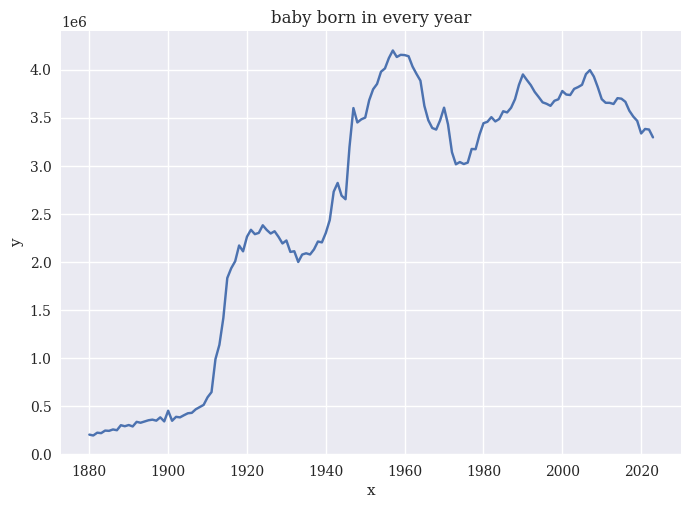

In [86]:
import matplotlib as mpl
mpl.__version__ 
import matplotlib.pyplot as plt  
plt.style.use('seaborn-v0_8')  
mpl.rcParams['font.family'] = 'serif'  
yearsum=alltxt.groupby(['year'])['number'].sum()
x=yearsum.index#所以在新的列表中，年份变成了索引是么？
y=yearsum.values
plt.title('baby born in every year')#似乎不能用中文命名图？
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y) #没太看懂这个y轴是什么意思，自动取了对数吗？


**统计新生儿姓名比例**

得到出生婴儿总数数据后，我们接下来需要在表中插入一个prop列，用于存放指定名字的婴儿数相对于出生总数的比例。我们项按照年份与性别进行分组，然后计算比例，然后再将这个列添加到各个分组上。

In [87]:
alltxt['totalsum']=alltxt.groupby(['year','sex'])['number'].transform('sum')
alltxt['prop']=alltxt['number']/alltxt['totalsum']
print(alltxt)

              name sex number  year totalsum      prop
0             Mary   F   7065  1880    90994  0.077642
1             Anna   F   2604  1880    90994  0.028617
2             Emma   F   2003  1880    90994  0.022012
3        Elizabeth   F   1939  1880    90994  0.021309
4           Minnie   F   1746  1880    90994  0.019188
...            ...  ..    ...   ...      ...       ...
2117214      Zyell   M      5  2023  1701224  0.000003
2117215       Zyen   M      5  2023  1701224  0.000003
2117216     Zymirr   M      5  2023  1701224  0.000003
2117217     Zyquan   M      5  2023  1701224  0.000003
2117218      Zyrin   M      5  2023  1701224  0.000003

[2117219 rows x 6 columns]


**数据完整性检验**

在对数据进行分组操作后，我们有必要对数据进行一个完整性检验。对于该数据集的一个可能的思路是，我们可以验证所有分组的prop列的和是否为1：

In [88]:
check=alltxt.groupby(['year','sex'])['prop'].sum()
print(check)

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2021  M      1.0
2022  F      1.0
      M      1.0
2023  F      1.0
      M      1.0
Name: prop, Length: 288, dtype: object


**取数据的子集进行进一步分析**

完成完整性检查后，为了便于进一步分析，我们需要取出该数据集的一个子集——对每对sex/year组合的前1000个名字。我们继续进行分组操作：

In [ ]:
alltxt1000=alltxt.groupby(['year', 'sex'], group_keys=False).apply(lambda x: x.head(1000))
print(alltxt1000)

              name sex number  year totalsum      prop
0             Mary   F   7065  1880    90994  0.077642
1             Anna   F   2604  1880    90994  0.028617
2             Emma   F   2003  1880    90994  0.022012
3        Elizabeth   F   1939  1880    90994  0.021309
4           Minnie   F   1746  1880    90994  0.019188
...            ...  ..    ...   ...      ...       ...
2104065   Thatcher   M    220  2023  1701224  0.000129
2104066      Abner   M    219  2023  1701224  0.000129
2104067     Cullen   M    219  2023  1701224  0.000129
2104068     Damari   M    219  2023  1701224  0.000129
2104069     Hollis   M    219  2023  1701224  0.000129

[287876 rows x 6 columns]


C:\Users\shehu\AppData\Local\Temp\ipykernel_16832\451996140.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  alltxt1000=alltxt.groupby(['year', 'sex'], group_keys=False).apply(lambda x: x.head(1000))


使用`len()`方法查看数据集的长度

In [90]:
len(alltxt1000)

287876

### 3. 分析名字趋势

在获得处理完成的数据集后，我们有进一步获得了前1000的数据集，接下来我们就可以着手分析各种名字的趋势了

#### 3.1 几个常见男孩与女孩名字的变化趋势

首先，我们将前1000个名字按照性别分为男女两个部分，在这里我们运用一个简单的布尔索引即可完成。我们最终可以得到两个简单的时间序列，只需稍作整理就可以绘制出相应的图表。我们首先来看几个常见名字的数量趋势——John、Mary、Harry、Marilyn

1. 将top1000的数据分为男女两个部分

In [91]:
male1000 = alltxt1000[alltxt1000['sex']=='M']
female1000 = alltxt1000[alltxt1000['sex']=='F']

2. 生成一张按年与名字统计的总数透表

In [92]:
#其实没太看懂要求
mangroup = male1000.groupby(['year', 'name'])['number'].sum().unstack(fill_value=0)
womangroup = female1000.groupby(['year', 'name'])['number'].sum().unstack(fill_value=0)

KeyboardInterrupt: 

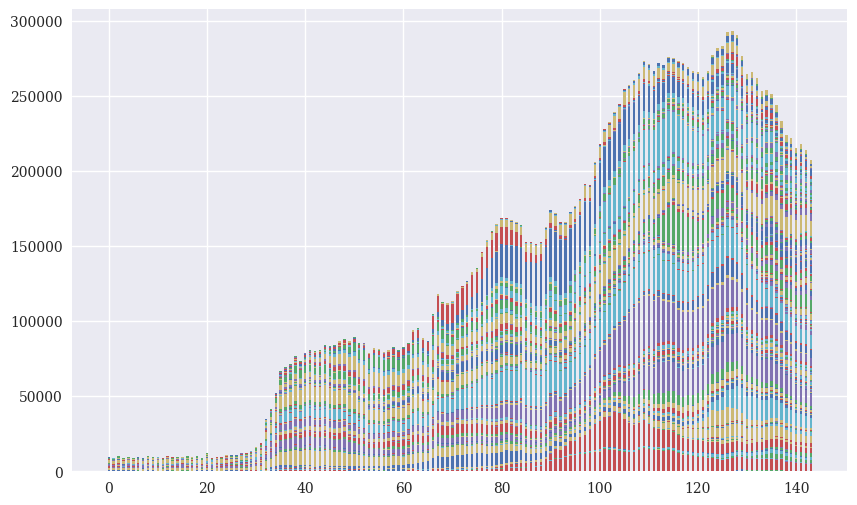

In [ ]:
mangroup.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Count by Year and Name')
plt.xlabel('year')
plt.ylabel('Total Count')
plt.legend(title='name')
plt.grid(axis='y')
plt.show()
#我想画一个男生的姓名数量堆叠柱状图，但这行代码跑了五分钟都没出结果qwq,然后出现了一个很恐怖的图


3. 使用`info()`方法查看表格的总体信息，然后使用`plot`方法来绘制几个名字的曲线图

In [ ]:
mangroup.info()
womangroup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1880 to 2023
Columns: 3724 entries, Aaden to Zyon
dtypes: object(3724)
memory usage: 4.1+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1880 to 2023
Columns: 4352 entries, Aadhya to Zuri
dtypes: object(4352)
memory usage: 4.8+ MB
name Aadhya Aaliyah Aanya Aarna Aaron Aarya Abagail Abbey Abbie Abbigail  ...  \
year                                                                      ...   
1880      0       0     0     0     0     0       0     0    71        0  ...   
1881      0       0     0     0     0     0       0     0    81        0  ...   
1882      0       0     0     0     0     0       0     0    80        0  ...   
1883      0       0     0     0     0     0       0     0    79        0  ...   
1884      0       0     0     0     0     0       0     0    98        0  ...   
...     ...     ...   ...   ...   ...   ...     ...   ...   ...      ...  ...   
2019      0    3664     0     0     0     0      

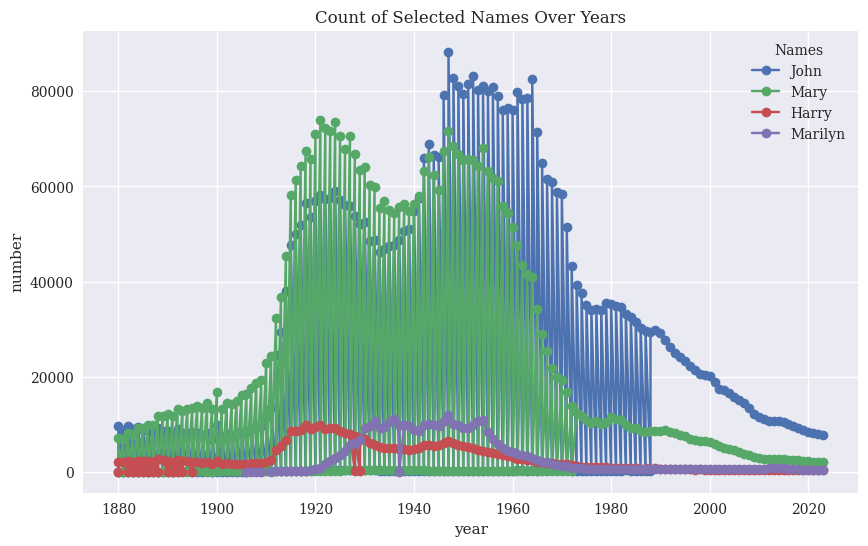

In [107]:
plt.figure(figsize=(10, 6))
names_to_plot = ['John','Mary','Harry','Marilyn']
selected_data = alltxt1000[alltxt1000['name'].isin(names_to_plot)]
for name in names_to_plot:
    name_data = selected_data[selected_data['name'] == name]
    plt.plot(name_data['year'], name_data['number'], marker='o',label=name)
plt.title('Count of Selected Names Over Years')
plt.xlabel('year')
plt.ylabel('number')
plt.legend(title='Names') 
plt.grid(True)
plt.show()
#不知道为什么不会形成完美的曲线，而是变成了和x轴往返的折线

*结论：* 从图中可以看出，这几个常见的名字随时间的推移，他们在美国人的心中已经风光不再了。接下来我们将继续探索其中的缘由。 

#### 3.2 评估姓名多样性的增长

常见姓名趋势下降的一个常见的解释是越来越少的父母愿意给小孩起常见的名字，我们可以从简单的聚合与绘图操作中验证这个解释：

1. 计算最流行的1000个名字所占的出生比例

In [128]:
def calculate_top1000_ratio(group):#group可以直接看成某个子列表吗？还是不能当作列表来写代码？
    top1000 = group.head(1000)
    top1000_total = top1000['number'].sum()
    total_births = group['number'].sum()
    return top1000_total / total_births
ratios = alltxt1000.groupby('year').apply(calculate_top1000_ratio)
# ratios本身是什么格式的，为什么需要转化成dataframe
ratios_all1000 = ratios.reset_index(name='Top1000_Ratio')
print(ratios_all1000)


     year  Top1000_Ratio
0    1880       0.850890
1    1881       0.862083
2    1882       0.487587
3    1883       0.517492
4    1884       0.529590
..    ...            ...
139  2019       0.455936
140  2020       0.456603
141  2021       0.457574
142  2022       0.458339
143  2023       0.457761

[144 rows x 2 columns]


C:\Users\shehu\AppData\Local\Temp\ipykernel_16832\2255357551.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratios = alltxt1000.groupby('year').apply(calculate_top1000_ratio)


2. 按照性别与年份进行聚合，并绘图

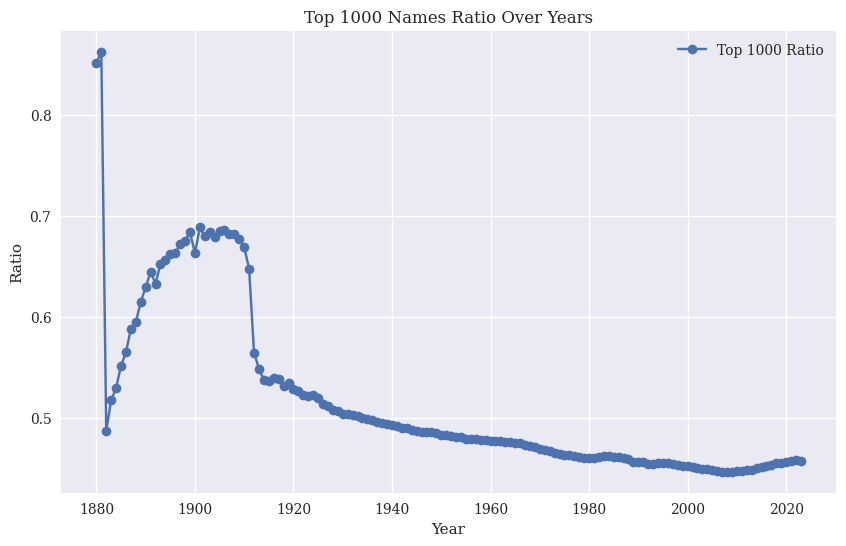

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(ratios_all1000['year'], ratios_all1000['Top1000_Ratio'], marker='o', label='Top 1000 Ratio')
plt.title('Top 1000 Names Ratio Over Years')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.show()#这个图真的好诡异，真的是这样变化的么？

从图中我们可以看出，名字的多样性确实得到了增长，因为top1000各名字所占的总比例逐渐降低，说明姓名总数增加。另一个可行的办法是我们可以计算占出生人口前50%的不同名字的数量，并按照受欢迎的程度从高到低进行排序。

1. 首先只考虑2010年的男孩名字

In [135]:
fpath="D:\\gitbox\\git_sourcetree_weekwork\\Week2\\names\\data\\names\\yob2010.txt"
txt2010=pd.read_csv(
    fpath,
    sep=",",
    header=None,
    names=['name','sex','number']
)
txt2010boy=txt2010[txt2010['sex']=='M']
txt2010boy['totalsum']=txt2010boy.groupby(['sex'])['number'].transform('sum')
txt2010boy['prop']=txt2010boy['number']/alltxt['totalsum']
print(txt2010boy)

            name sex  number  totalsum      prop
19833      Jacob   M   22148   1918132  0.183265
19834      Ethan   M   18015   1918132  0.149067
19835    Michael   M   17376   1918132  0.143779
19836     Jayden   M   17198   1918132  0.142306
19837    William   M   17068   1918132  0.141231
...          ...  ..     ...       ...       ...
34096    Zymaire   M       5   1918132  0.000022
34097     Zyonne   M       5   1918132  0.000022
34098  Zyquarius   M       5   1918132  0.000022
34099      Zyran   M       5   1918132  0.000022
34100      Zzyzx   M       5   1918132  0.000022

[14268 rows x 5 columns]


C:\Users\shehu\AppData\Local\Temp\ipykernel_16832\2018177350.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt2010boy['totalsum']=txt2010boy.groupby(['sex'])['number'].transform('sum')
C:\Users\shehu\AppData\Local\Temp\ipykernel_16832\2018177350.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt2010boy['prop']=txt2010boy['number']/alltxt['totalsum']


2. 对prop进行降序排列，使用numpy计算需要多少最受欢迎的名字才能使得人数加起来等于50%。先计算prop的累计与`cusum`，然后通过`searchsorted`方法找出0.5应该被插入那个位置才不会破坏顺序

In [137]:
import numpy as np
cumulative_sum = np.cumsum(txt2010boy['prop'])
threshold_index = np.searchsorted(cumulative_sum, 0.5)

print(f"需要前 {threshold_index + 1} 个名字才能达到 50% 的比例。")


需要前 4 个名字才能达到 50% 的比例。


3. 对各个year/sex应用该函数。按照这两个字段进行groupby处理，然后通过applu计算各分组的计数。

In [141]:
def calculate_top_n_for_threshold(group, threshold=0.5):
    cumulative_sum = np.cumsum(group['prop'])
    return np.searchsorted(cumulative_sum, threshold) + 1

result = alltxt1000.groupby(['year', 'sex']).apply(
    lambda group: calculate_top_n_for_threshold(group)
).reset_index(name='Top_Names_for_50%')
print(result)


     year sex  Top_Names_for_50%
0    1880   F                 38
1    1880   M                 14
2    1881   F                 38
3    1881   M                 14
4    1882   F                 38
..    ...  ..                ...
283  2021   M                167
284  2022   F                284
285  2022   M                173
286  2023   F                288
287  2023   M                178

[288 rows x 3 columns]


C:\Users\shehu\AppData\Local\Temp\ipykernel_16832\3388133795.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = alltxt1000.groupby(['year', 'sex']).apply(


4. 对得到的姓名多样性进行绘图

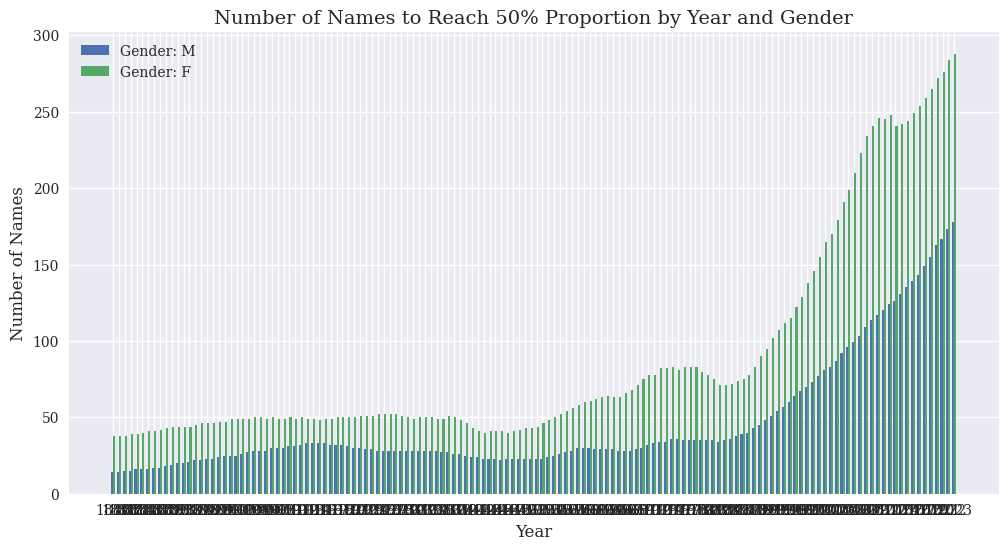

In [142]:
plt.figure(figsize=(12, 6))
years = result['year'].unique()
gender_labels = ['M', 'F']
bar_width = 0.35 
x_indexes = np.arange(len(years)) 
for i, gender in enumerate(gender_labels):
    gender_data = result[result['sex'] == gender]
    plt.bar(
        x_indexes + i * bar_width, 
        gender_data['Top_Names_for_50%'], 
        width=bar_width, 
        label=f'Gender: {gender}'
    )

plt.title('Number of Names to Reach 50% Proportion by Year and Gender', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Names', fontsize=12)
plt.xticks(ticks=x_indexes + bar_width / 2, labels=years)  # 设置 x 轴刻度为年份
plt.legend()

plt.show()

*结论：* 从图中可以看出，女孩名字总比男孩名字更多样，而且随时间推移这种多样性的差别还在加大。我们可以继续探究是什么导致/驱动多样性的变化，比如拼写形式的变化。

#### 3.3 “One Last Letter”的变化

一位婴儿姓名研究人员Laurra Wattenberg在2007年曾指出，近百年来，男孩名字的最后一个字母的分布发生了显著的变化。接下来我们可以来具体的探究一下关于男孩姓名最后一个字母的变革的现象。

**各年度分性别的姓名最后一个字母比例统计**

为了了解具体的情况，我们首先将全部出生数据按照年度、性别以及末字母进行聚合。我们可以使用`pd.map()`方法来将姓名的尾字母映射到Dataframe上。

我们选取出其中最具代表性的三年——1910、1960、2010，并打印出前三行的数据进行查看

接下来，我们统计出生总数，按照出生总数对该表进行标准化处理，以便计算出一个新表格，我们希望其中包括每个字母结尾的性别占出生总人数的比例。

得到上述比例表后，我们就能够生成一张年度各性别的柱状图：

可以看出，从20世纪60年代开始，以字母‘n’结尾的男孩姓名出现了显著增长。为了更显示的展示，我们可以使用之前创建的完整表格，按照年度与性别对其进行标准化处理，最后专职将各列转换成时间序列，之后绘制出趋势图。

#### 3.4 姓名性别互换（男孩名字变成女孩名字以及相反的情况）

除了上述我们探索的几种情况之外，另一个有趣的趋势是早年流行于样本中某个性别的名字进来发生了“变性”，例如：Lesly与Leslie两个名字。我们一这两个名字为例对该现象进行探究。

1. 首先我们回到top1000的表格中，计算得到以‘Lesl’开头的名字列表。首先使用`unique`方法得到姓名的列表，及去掉重复的名字，然后选择以‘Lesl’开头的名字。

2. 利用上述结果过滤名字，并且按照名字分组计算出生总数一查看相对频率。

3. 按照性别与年度进行聚合，并按照年度进行标准化处理。

4. 最终可以绘制出对应的趋势图

可以看出使用'Lesley'式的名字的趋势的性别比例发生了反转。

### 4. 总结

请在这里写下你的结论与感悟~
我们也期待着大家的建议！

### 附录

大家可以在这一部分继续自己对于该数据集的探索，我们鼓励大家自己进行数据探索并得到一些有趣的结论~ 